# Week 11.2 Assignment
- Joshua Burden
- Bellevue University
- DSC550 Data Mining
- Dr. Brett Werner
- 11/13/2022

In [2]:
#### Import all the libraries
import numpy as np
import pandas as pd
from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import utils as np_utils
from keras import backend as K
from matplotlib import pyplot
from tensorflow import keras
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


## In this exercise, you will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset. The steps to build a CNN classifier are outlined in section 20.15 of the Machine Learning with Python Cookbook, but keep in mind that your code may need to be modified depending on your version of Keras.

### Load the MNIST data set.

In [3]:
(data_train, target_train), (data_test, target_test) = mnist.load_data()

In [4]:
## Printing the shape of the training and test datasets
print("Training dataset: {}".format(data_train.shape))
print("Testing dataset: {}".format(data_test.shape))

Training dataset: (60000, 28, 28)
Testing dataset: (10000, 28, 28)


### Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

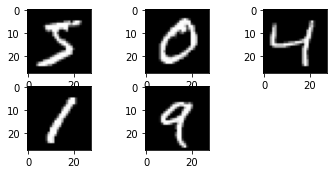

In [5]:
# Display first 5 images in training data set
for i in range(5):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(data_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

### Build and train a Keras CNN classifier on the MNIST training set.

In [6]:
# Set that the color channel value will be last
K.set_image_data_format("channels_last")

In [7]:
# Set that the color channel value will be first
K.set_image_data_format("channels_first")
# Set seed
np.random.seed(0)
# Set image information
channels = 1
height = 28
width = 28

In [8]:

# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], height, width, channels)
# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], height, width, channels)
# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

In [9]:
# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]
# Start neural network
network = Sequential()

In [10]:
## Use channel_last due to CPU errors
K.set_image_data_format('channels_last')

In [11]:

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(height, width, channels),
                   activation='relu'))

In [12]:

# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer
network.add(Dropout(0.5))
# Add layer to flatten input
network.add(Flatten())
# Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))
# Add dropout layer
network.add(Dropout(0.5))
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

In [13]:
# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

In [14]:
# Train neural network
network.fit(features_train, # Features
            target_train, # Target
            epochs=2, # Number of epochs
            verbose=0, # Don't print description after each epoch
            batch_size=1000, # Number of observations per batch
            validation_data=(features_test, target_test)) # Data for evaluation

### Report the test accuracy of your model.

In [15]:
# Use evaluate to get the accuracy of the model
network.evaluate(features_test, target_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9733


[0.08544550836086273, 0.9732999801635742]

### Display a confusion matrix on the test set classifications.

In [16]:
# Predict
predicted_target = network.predict(features_test)

313/313 [==============================] - 1s 3ms/step


In [19]:
print(predicted_target)

[[1.00516979e-06 5.39643679e-07 1.08054292e-05 ... 9.99831319e-01
  1.32293258e-06 9.38046069e-05]
 [2.46779109e-05 1.55870002e-04 9.99728143e-01 ... 9.46440792e-08
  2.18294790e-05 1.50548267e-08]
 [2.50646772e-05 9.98908043e-01 1.75194975e-04 ... 3.62920167e-04
  1.89165556e-04 2.44384246e-05]
 ...
 [2.88879619e-06 2.51134152e-05 1.86425234e-06 ... 1.16277515e-04
  2.29285550e-04 6.55137002e-04]
 [8.69579890e-06 2.38806319e-06 1.80041155e-07 ... 5.83032431e-07
  2.24987720e-03 7.56194993e-07]
 [9.76212232e-06 1.54635472e-06 1.43901743e-05 ... 4.14780565e-08
  1.34357958e-06 2.53587160e-07]]


In [24]:
# Convert values for confusion matrix
y_true = np.argmax(target_test, axis=1)

In [25]:
# Convert values for confusion matrix
y_preds = np.argmax(predicted_target, axis=1)

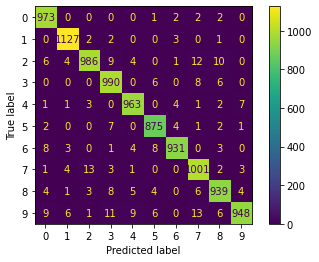

In [26]:
## Visualize confusion matrix
conf_matrix = confusion_matrix(y_true, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
pyplot.show()


### Summarize your results.

The training set is used to perform the initial training of the model and to init the weights of the neural network. Overall the model is 97.3% accurate on the test dataset. The test set classification from the Neural Network gets out of 100 test set examples, the model classifies 97 of them correctly. 